Central Question: What listening patterns, in terms of genre, frequency, or streaming habits, signal elevated mental health risk?

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

In [2]:
df = pd.read_csv('/content/mxmh_survey_results.csv')
df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

In [4]:
#To clean the dataset, I'll drop the "Timestamp" and "Permissions" columns
df.drop(['Timestamp', 'Permissions'], axis=1, inplace=True)

## Exploratory Data Analysis

In [5]:
#first I want to provide a setup for clean visuals for the EDA
sns.set(style = 'whitegrid')
plt.rcParams['figure.figsize'] = (10, 5)

In [6]:
#Next I want to show the dataset shape and column names
print('Shape:', df.shape)
print('\nColumns:\n', df.columns.tolist())

Shape: (736, 31)

Columns:
 ['Age', 'Primary streaming service', 'Hours per day', 'While working', 'Instrumentalist', 'Composer', 'Fav genre', 'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]', 'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]', 'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]', 'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects']


In [7]:
#Now I'll check for any missing values
missing = df.isnull().sum()
missing = missing[missing > 0]
print("\nMissing values:\n", missing)


Missing values:
 Age                            1
Primary streaming service      1
While working                  3
Instrumentalist                4
Composer                       1
Foreign languages              4
BPM                          107
Music effects                  8
dtype: int64


In [8]:
#The small counts (1-4) are not too big of a concern
#Music Effects had 8 missing values which is moderate but not too big of a deal thus far
#BPM had the largest number of missing values. I will keep this in mind and potentially drop this as I move forward with my analysis

In [29]:
#I'll also identify genre frequency columns before I move on to visualization
genre_cols = [col for col in df.columns if col.startswith("Frequency")]
print("\nGenre Frequency columns:\n", genre_cols)


Genre Frequency columns:
 ['Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]', 'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]', 'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]']


In [63]:
#Now I need to map the frequency values to numerical values for better visualization
#This is the mapping dictionary
freq_map = {
    "Never": 0,
    "Rarely": 1,
    "Sometimes": 2,
    "Very frequently": 3
}

# Now I'll apply mapping to all genre frequency columns
df[genre_cols] = df[genre_cols].replace(freq_map)


#An important consideration moving forward would be to create a new feature from the existing features i have in the dataset and use that moving forward
#So I thought of Genre Diversity as a new feature
df['Genre_Diversity'] = (df[genre_cols] >= 2).sum(axis=1) #this means that when someone says "Sometimes" (mapped to 2) or "Very Frequently" (mapped to 3) means this person really engages with that genre. Anything below we treat as not part of their core set.
#This is different from the frequency mapping we're doing in the first steps because this coutns how many of the 16 genres people listen to "Sometimes" or more. So now this new feature gives me a single integer (0-16) that says "this person really engages with X different genres"


# I'll double-check mapping here
print(df[genre_cols].head())

   Frequency [Classical]  Frequency [Country]  Frequency [EDM]  \
0                      1                    0                1   
1                      2                    0                0   
2                      0                    0                3   
3                      2                    0                0   
4                      0                    0                1   

   Frequency [Folk]  Frequency [Gospel]  Frequency [Hip hop]  \
0                 0                   0                    2   
1                 1                   2                    1   
2                 0                   0                    1   
3                 1                   2                    0   
4                 0                   1                    3   

   Frequency [Jazz]  Frequency [K pop]  Frequency [Latin]  Frequency [Lofi]  \
0                 0                  3                  3                 1   
1                 3                  1                  2   

Here I'll visualize the new feature I created

<ipython-input-66-40a31feb1f95>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
<ipython-input-66-40a31feb1f95>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-66-40a31feb1f95>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
<ipython-input-66-40a31feb1f95>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-66-40a31feb1f95>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
<ipython-input-66-40a31feb1f95>:13: FutureWarning: 

Passing `palette` without assigning `hue` is de

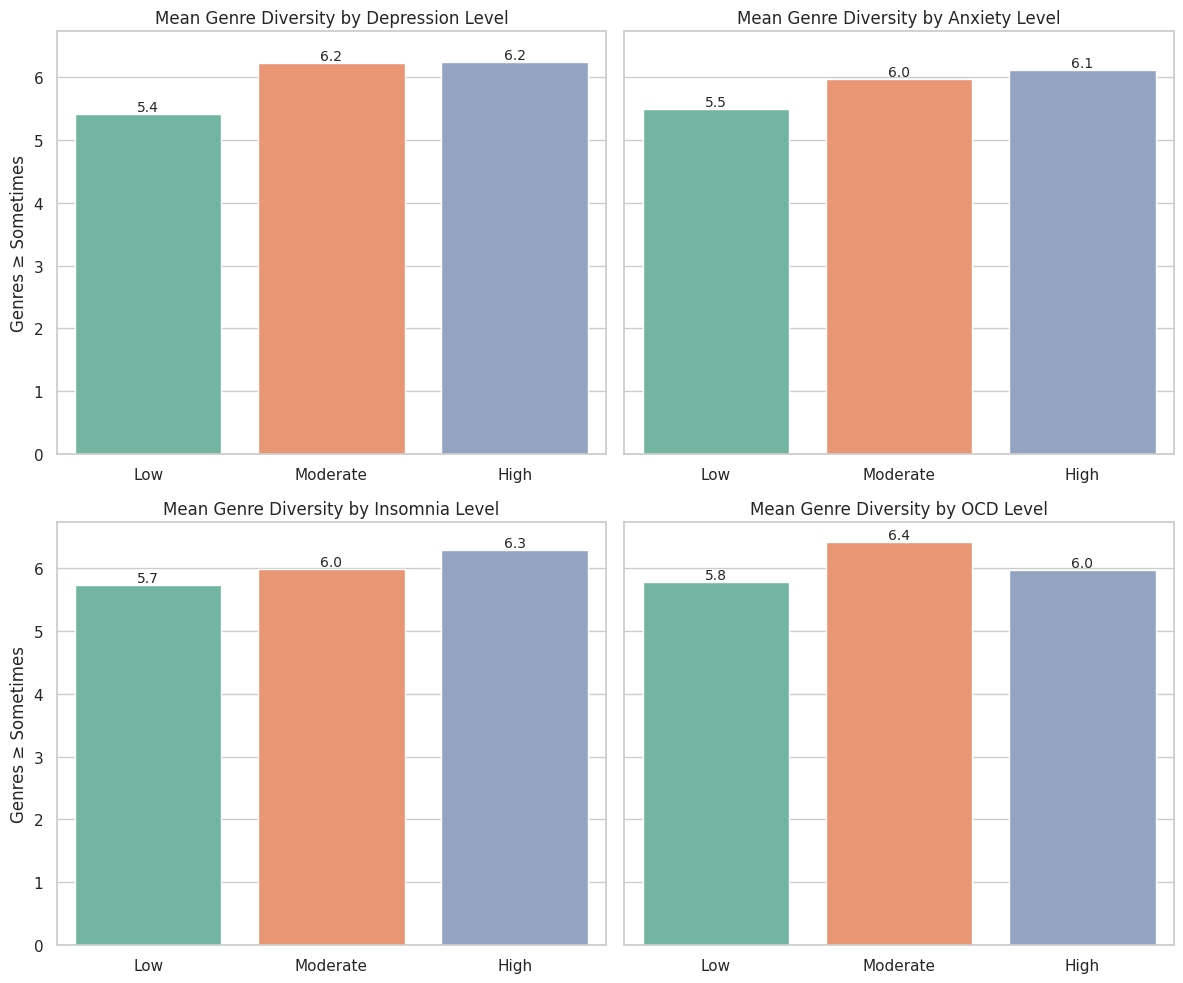

In [66]:
levels    = ['Low','Moderate','High']
plot_args = [
    ('Depression_Level', 'Depression'),
    ('Anxiety_Level',    'Anxiety'),
    ('Insomnia_Level',   'Insomnia'),
    ('OCD_Level',        'OCD')
]

fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharey=True)

for ax, (lvl_col, title) in zip(axes.flatten(), plot_args):
    # simple bar of means, no CI
    sns.barplot(
        data=df,
        x=lvl_col,
        y='Genre_Diversity',
        order=levels,
        ci=None,
        palette='Set2',
        ax=ax
    )
    # annotate exact mean on top
    for p in ax.patches:
        ax.annotate(
            f"{p.get_height():.1f}",
            (p.get_x()+p.get_width()/2, p.get_height()),
            ha='center', va='bottom',
            fontsize=10
        )
    ax.set_title(f"Mean Genre Diversity by {title} Level")
    ax.set_xlabel('')
    ax.set_ylabel('Genres ≥ Sometimes')

plt.tight_layout()
plt.show()

In [ ]:
#Depression: People reporting moderate or high depression listen across about one more genre on average than those with low depression
#Anxiety: There is also an upward trend. Higher anxiety corresponds to sampling roughly half a genre more on average compared to low anxiety
#Insomnia: There is a steady increase here. Those with the worst sleep issues explore about 0.6 more genres than the low-insomnia group
#OCD: Moderate-OCD respondents sample the widest set of genres, yet it dips among the highest OCD-group

Countplot for Severity Distributions

In [31]:
#Now I'll define a 3-category risk level function to map the four mental health columns to three different categories
def risk_level(score):
    if score <= 3:
        return "Low"
    elif score <= 6:
        return "Moderate"
    else:
        return "High"

#I'll apply that function to all four mental health scores
df['Depression_Level'] = df['Depression'].apply(risk_level)
df['Anxiety_Level'] = df['Anxiety'].apply(risk_level)
df['Insomnia_Level'] = df['Insomnia'].apply(risk_level)
df['OCD_Level'] = df['OCD'].apply(risk_level)

#Here is a preview to confirm
df[['Depression', 'Depression_Level', 'Anxiety', 'Anxiety_Level']].head()

,Depression,Depression_Level,Anxiety,Anxiety_Level
0,0.0,Low,3.0,Low
1,2.0,Low,7.0,High
2,7.0,High,7.0,High
3,7.0,High,9.0,High
4,2.0,Low,7.0,High


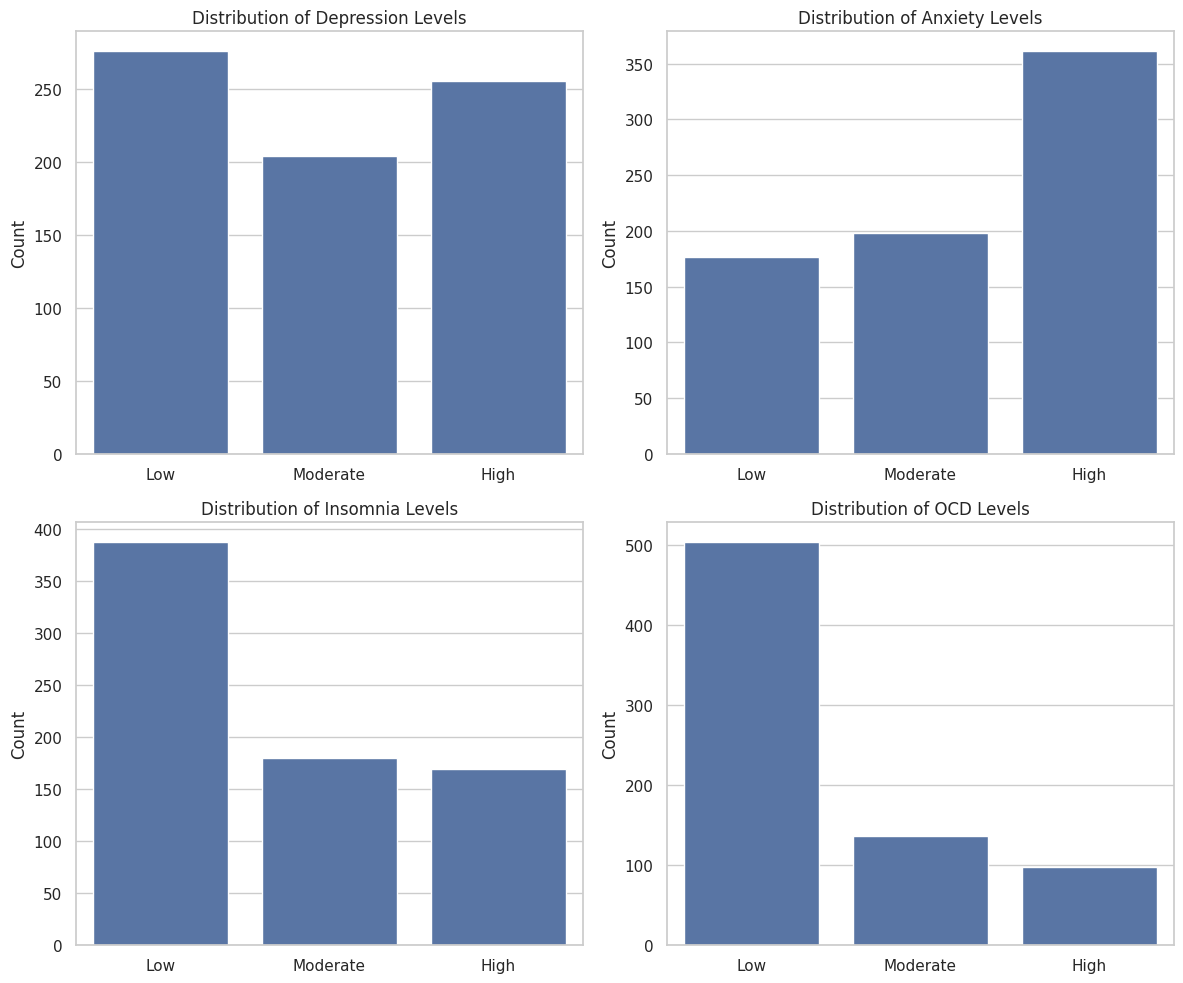

In [32]:
for mh in ['Depression','Anxiety','Insomnia','OCD']:
    df[f'{mh}_Level'] = df[mh].apply(risk_level)

#This creates the 2x2 subplot for easier visualization
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

plot_args = [
    ('Depression_Level', 'Distribution of Depression Levels'),
    ('Anxiety_Level',    'Distribution of Anxiety Levels'),
    ('Insomnia_Level',   'Distribution of Insomnia Levels'),
    ('OCD_Level',        'Distribution of OCD Levels')
]

for ax, (col, title) in zip(axes.flatten(), plot_args):
    sns.countplot(
        data=df,
        x=col,
        order=['Low','Moderate','High'],
        ax=ax
    )
    ax.set_title(title)
    ax.set_xlabel('')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

In [33]:
#The above visual is quite interesting. Below are some insights I've pulled thus far:
# Depression: Respondents are fairly evenly split between Low and High, with a slightly smaller Moderate group
# Anxiety: There is a clear skew toward High anxiety which suggests that worry and nervousness are the most prevalent symptoms in our sample
# Insomnia: A lot of the participants report minimal sleep issues with fewer in Moderate and High, so sleep disruption is less common
# OCD: These are quite rare. Over 2/3 fall into Low, with fewer than 10% reporting High levels

Below I want to create two separate boxplots. The two I will be visualizing are in consecutive order:

1. The first boxplots will display Hours per Day vs Each Mental-Health Severity Level
2. The second boxplots will display Average Genre Frequency vs Each Mental-Health Severity

<ipython-input-34-56bceec08a57>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-34-56bceec08a57>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-34-56bceec08a57>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-34-56bceec08a57>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


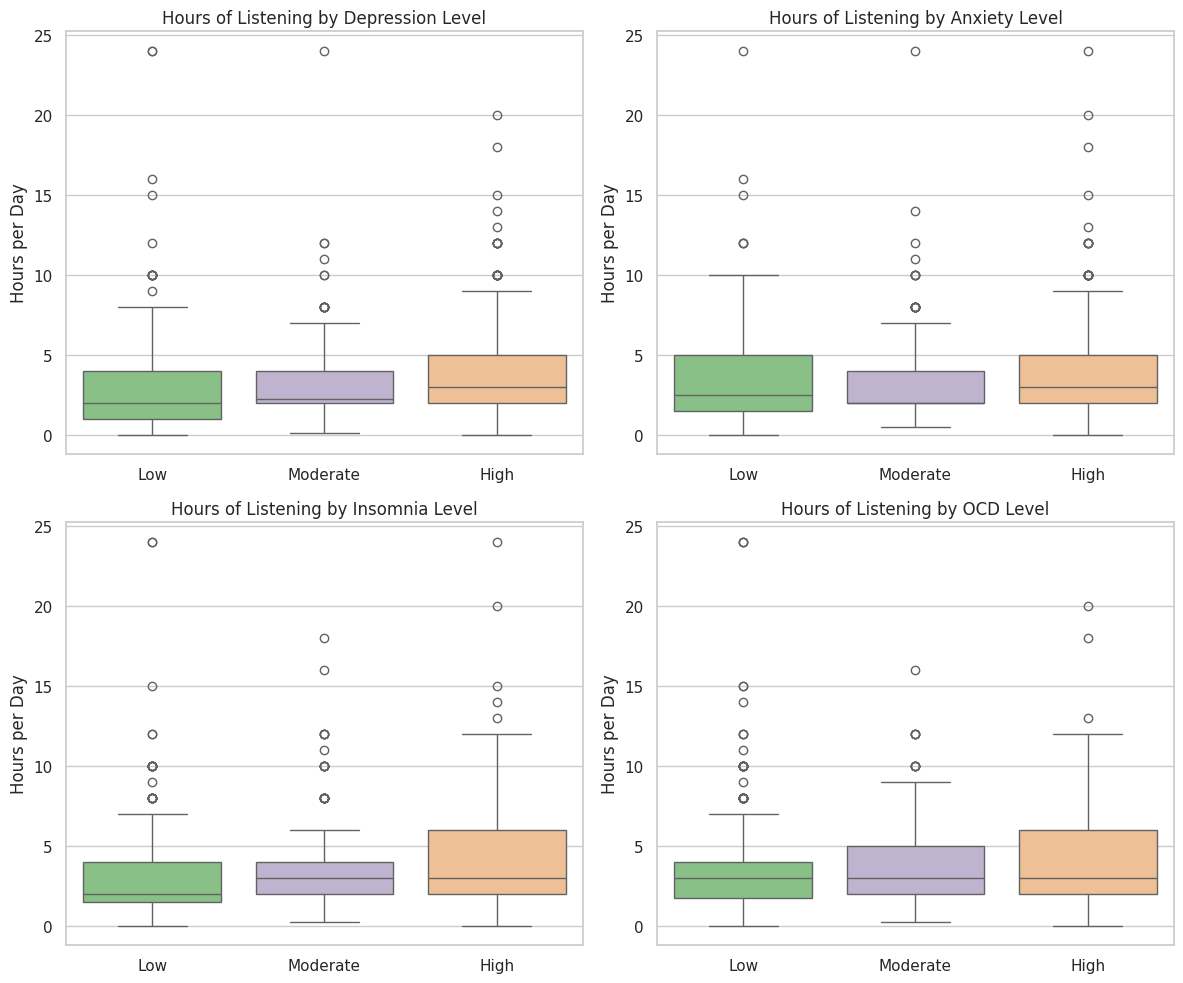

In [34]:
#I'll define the order once since we are using the 2x2 subplot technique again
levels = ['Low', 'Moderate', 'High']
plot_args = [
    ('Depression_Level', 'Depression'),
    ('Anxiety_Level',    'Anxiety'),
    ('Insomnia_Level',   'Insomnia'),
    ('OCD_Level',        'OCD')
]

#This actually creates the 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for ax, (col, title) in zip(axes.flatten(), plot_args):
    sns.boxplot(
        data=df,
        x=col,
        y='Hours per day',
        order=levels,
        palette='Accent',
        ax=ax
    )
    ax.set_title(f'Hours of Listening by {title} Level')
    ax.set_xlabel('')
    ax.set_ylabel('Hours per Day')

plt.tight_layout()
plt.show()

In [35]:
#Across all four boxplots, there's a clear upward shift in median listening time from Low --> Moderate --> High. This suggests that respondents with more severe symptons tend to spend more time listening to music each day.

#Depression: the IQR widens in the High Group, and there are heavy outliers that cluster among those with higher depression
#Anxiety: High anxiety again shows more extreme outliers. This possibly shows that some anxious individuals lean heavily on music
#Insomnia: This can possibly reflect music's use as a sleep aid or coping mechanism for people struggling to rest
#OCD: Outliers up to 15 - 20 hrs/day appear among the High group. This indicates that a subset of respondents rely on music intensively.

<ipython-input-36-cee500178388>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-36-cee500178388>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-36-cee500178388>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-36-cee500178388>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


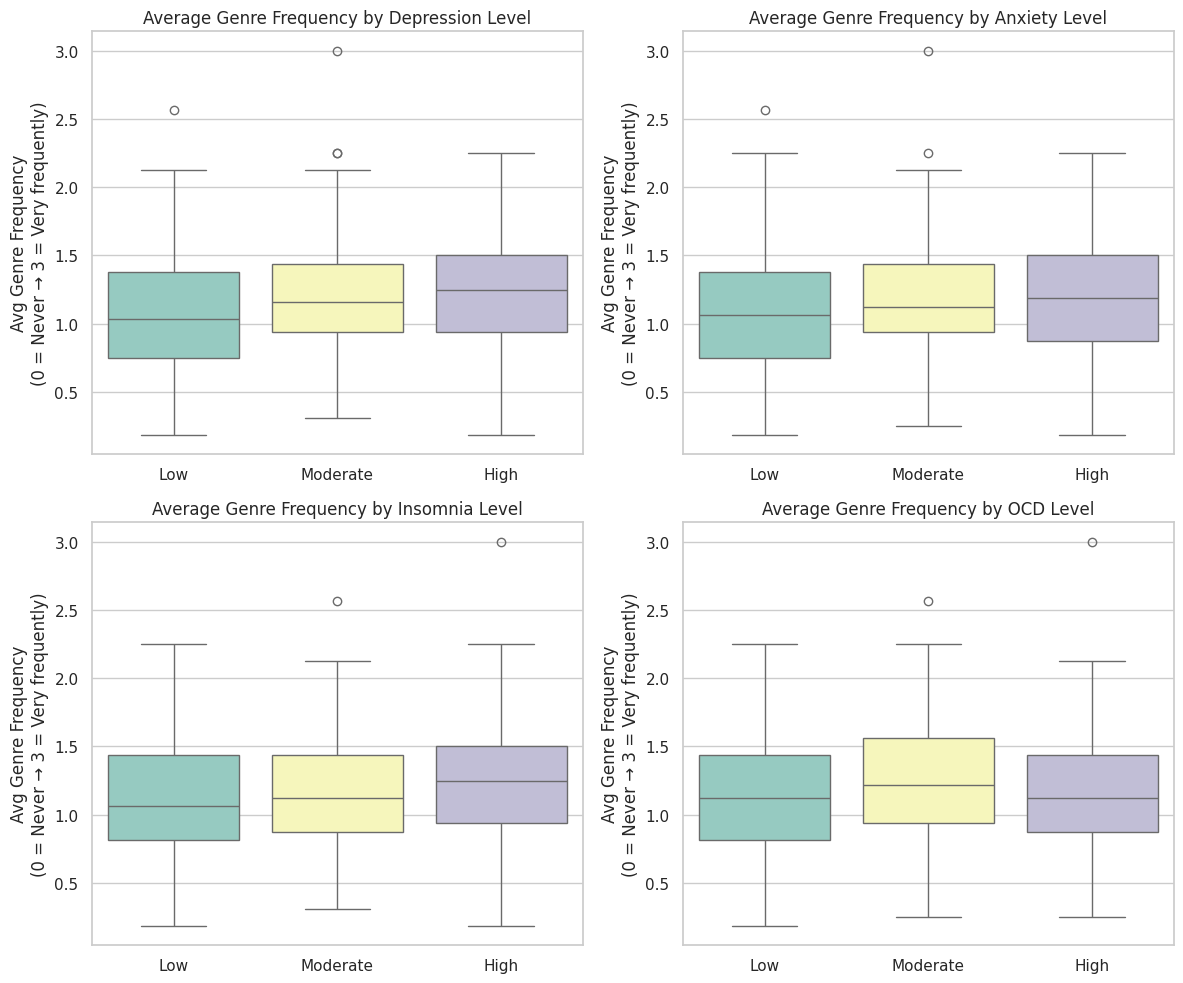

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#I'll reload and preprocess the dataset we are using just in case we've manipulated the dataset. This ensures we have clean, not manipulated data moving forward
df = pd.read_csv('/content/mxmh_survey_results.csv')
df.drop(['Timestamp', 'Permissions'], axis=1, inplace=True)#

#i'll map the genre frequencies to numbers
freq_map = {"Never": 0, "Rarely": 1, "Sometimes": 2, "Very frequently": 3}
genre_cols = [c for c in df.columns if c.startswith("Frequency")]
df[genre_cols] = df[genre_cols].apply(lambda col: col.map(freq_map))

#As I did before, I'll create 3‐level risk labels
def risk_level(score):
    if score <= 3:      return "Low"
    elif score <= 6:    return "Moderate"
    else:               return "High"

for mh in ['Depression','Anxiety','Insomnia','OCD']:
    df[f'{mh}_Level'] = df[mh].apply(risk_level)

#Here I'll compute the average genre-frequency summary (I provided a comment below for why I do this)
df['Avg_Genre_Frequency'] = df[genre_cols].mean(axis=1)

#Average Genre Frequency means that I'm turning each respondent's 16 individual-genre listening rating into a single summary number that captures how broadly and frequently they engage with music overall. I'm doing this only here for comparability purposes.

#I'll draw the 2×2 grid of Seaborn boxplots below
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 10)

levels = ['Low', 'Moderate', 'High']
plot_args = [
    ('Depression_Level', 'Depression'),
    ('Anxiety_Level',    'Anxiety'),
    ('Insomnia_Level',   'Insomnia'),
    ('OCD_Level',        'OCD')
]

fig, axes = plt.subplots(2, 2)

for ax, (col, title) in zip(axes.flatten(), plot_args):
    sns.boxplot(
        x=col,
        y='Avg_Genre_Frequency',
        data=df,
        order=levels,
        palette='Set3',
        ax=ax
    )
    ax.set_title(f'Average Genre Frequency by {title} Level')
    ax.set_xlabel('')  #Gives it a cleaner look
    ax.set_ylabel('Avg Genre Frequency\n(0 = Never → 3 = Very frequently)')

plt.tight_layout()
plt.show()

In [37]:
#Depression: The IQR widens in the High Group, with a handful of outliers reaching the maximum. This indicates that some individuals listen frequently across nearly all genres.
#Anxiety: Outliers in the High-Anxiety group extend to 3.0, which suggests that some people have a broader exploration of music styles among the most anxious.
#Insomnia: This boxplot shows less spread overall. Sleep-challenged individuals tend to sample genres somewwhat more, but not dramatically more.
#OCD: People with OCD may not have broader genre engagement as strongly as other conditions.

Heatmap showcasing Mean Genre Frequency

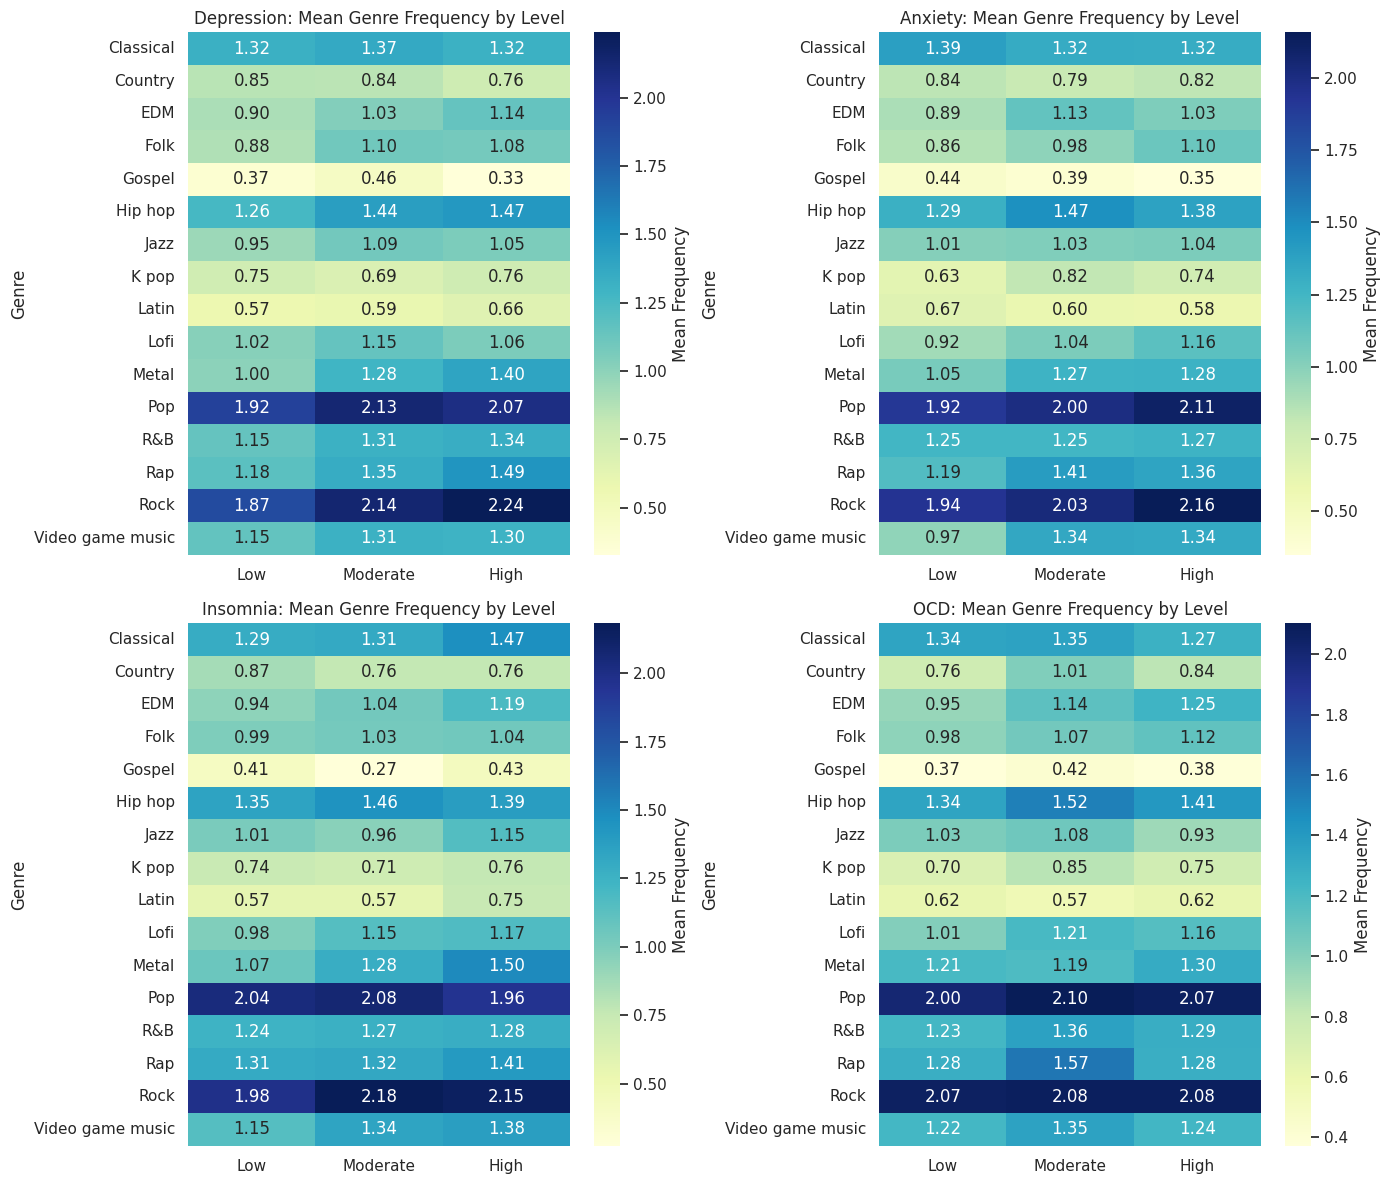

In [49]:
#I do the following code below to simplify the genre names. I had to research this issue to fix an issue I had with x-axis formatting
melted = df.melt(
    id_vars=['Depression_Level','Anxiety_Level','Insomnia_Level','OCD_Level'],
    value_vars=genre_cols,
    var_name='Genre',
    value_name='Frequency'
)
melted['Genre'] = melted['Genre'].str.extract(r'Frequency \[(.*)\]')[0]

levels = ['Low','Moderate','High']
metrics = ['Depression','Anxiety','Insomnia','OCD']

fig, axes = plt.subplots(2, 2, figsize=(14, 12), sharex=False)

for ax, mh in zip(axes.flatten(), metrics):
    # pivot to get mean frequency for each Genre × Level
    pivot = (
        melted
        .pivot_table(
            index='Genre',
            columns=f"{mh}_Level",
            values='Frequency',
            aggfunc='mean'
        )
        .reindex(columns=levels)   # enforce Low→Moderate→High order
    )

    sns.heatmap(
        pivot,
        ax=ax,
        annot=True, fmt=".2f",
        cmap="YlGnBu",
        cbar_kws={'label': 'Mean Frequency'}
    )
    ax.set_title(f"{mh}: Mean Genre Frequency by Level")
    ax.set_xlabel("")            # cleaner
    ax.set_ylabel("Genre")
    ax.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

In [40]:
#Anxiety
  #High anxiety respondents still lean into Rock and Pop which mirror the depression pattern with an even sharper jump in Rock for the High group.
  #EDM and Lofi also tick upward. This hints at the fact that both high-energy and chill-electronic styles play roles in anxiety coping
  #Country, Folk, and Gospel remain relatively low. This observation reinforces that niche or "softer" genres aren't driving the anxiety signal.

In [39]:
#Depression
	#As severity climbs from Low to Moderate to High, energetic genres like Pop and Rock show the biggest upticks in average listening frequency
	#Rap and Hip Hop also rise noteicably. This suggests heavier engagement with beat-driven music among those reporting higher depressive symptoms
	#Soften grenres such as Gospel actually dip in the High Group, implying that preferences shift strongly toward more intense styles

In [41]:
#Insomnia
  #The shift from Low to High is more muted here. Rock and Pop are still the top genres but not dramatically different from other levels.
  #Metal has a stronger clib for the High-insomnia group, which may reflect a subset using intense music to stake awake/cope with sleeplessness.
  #Softer genres such as Classical or Lofi have a slight build-up, which can indicate that people use mellow sounds to wind down.

In [42]:
#OCD
	#Genre means shift very little across all OCD levels. The entire heatmap is much flatter here.
	#The biggest jump is in Rap and Pop, but even these are modest compared to Depression and Anxiety.
	#OCD severity may not correspond strongly to broader exploration across genres. Listeners may stick to a stable set of favorites regardless of symptom level.

Countplot Showcasing Streaming Platform Usaage

<ipython-input-43-70c62cd53202>:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)
<ipython-input-43-70c62cd53202>:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)
<ipython-input-43-70c62cd53202>:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)
<ipython-input-43-70c62cd53202>:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)


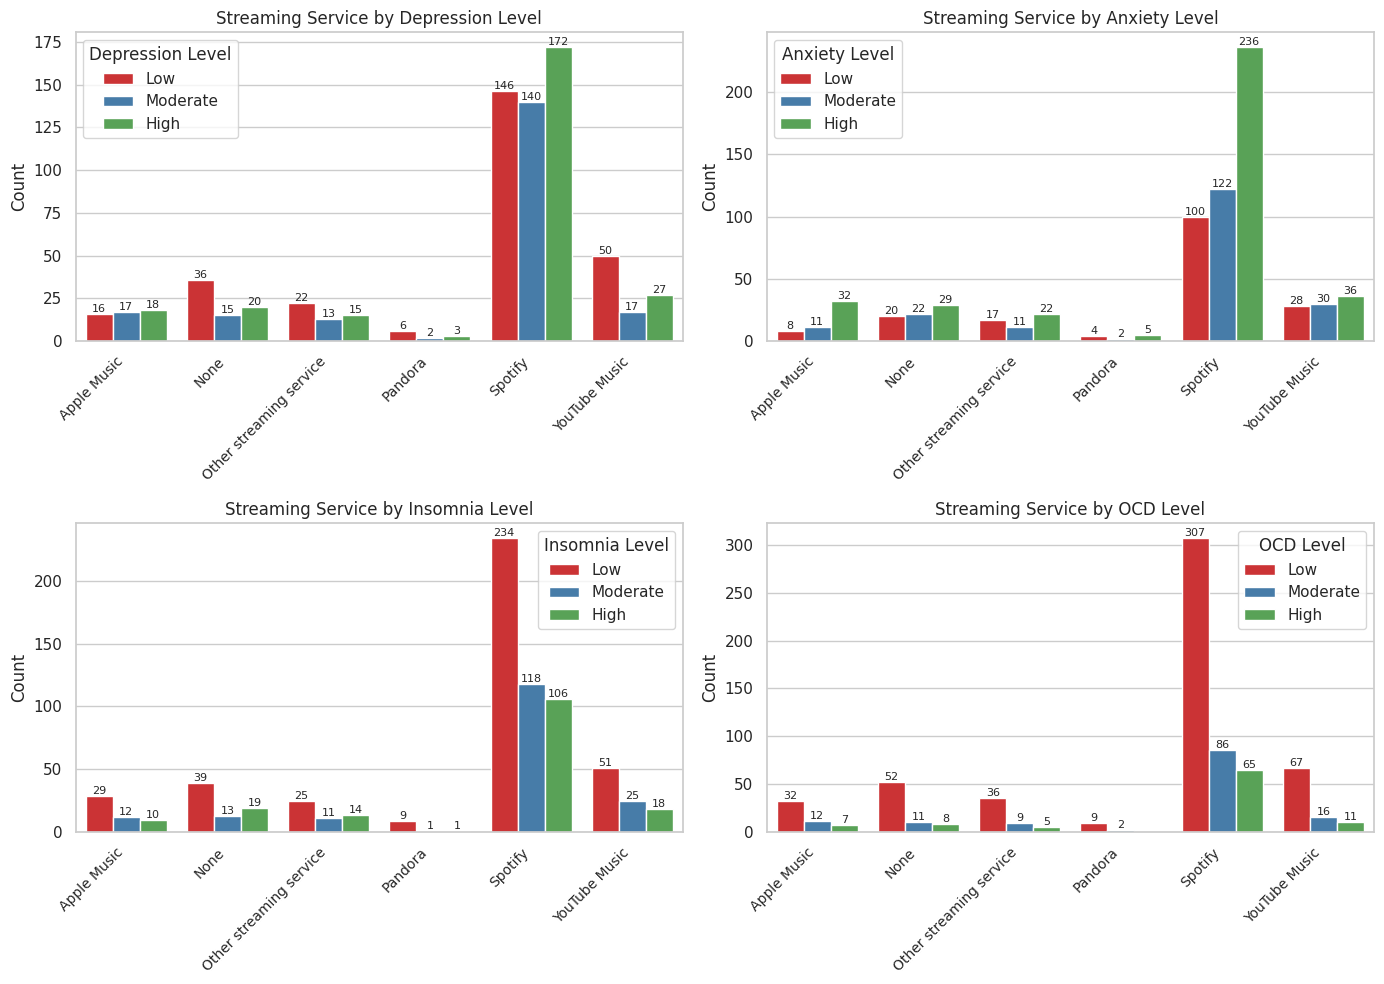

In [43]:
#This shorten the long labels that are in the dataset so it fits properly in the visual
df['Streaming_Short'] = (
    df['Primary streaming service']
      .replace({
          'I do not use a streaming service.': 'None',
          'Other streaming service.': 'Other'
      })
)

#Here I'll filter out any missing responses entirely
plot_df = df[df['Streaming_Short'].notna()]

#Here Ill build out the ordered list of services
services = sorted(plot_df['Streaming_Short'].unique())

#This sets up the plot as we've been doing with the different levels, etc.
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (14, 10)

levels    = ['Low', 'Moderate', 'High']
plot_args = [
    ('Depression_Level', 'Depression'),
    ('Anxiety_Level',    'Anxiety'),
    ('Insomnia_Level',   'Insomnia'),
    ('OCD_Level',        'OCD')
]

fig, axes = plt.subplots(2, 2)

for ax, (lvl_col, title) in zip(axes.flatten(), plot_args):
    sns.countplot(
        data=plot_df,
        x='Streaming_Short',
        hue=lvl_col,
        hue_order=levels,
        order=services,
        palette='Set1',
        ax=ax
    )
    ax.set_title(f"Streaming Service by {title} Level")
    ax.set_xlabel('')
    ax.set_ylabel('Count')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)
    ax.legend(title=f"{title} Level")

    for container in ax.containers: #this adds numbers to each count
      ax.bar_label(container, label_type='edge', fontsize=8)



plt.tight_layout()
plt.show()

In [44]:
#Depression: Spotify is the go-to for everyone, but especially for people with higher depression. It's bar climbs consistently from Low to High. YouTube music edges up, but doesn't get anywhere close.
#Anxiety: Spotify is still the winner, with YouTube Music second. Apple Music and Pandora stay relatively flat across levels.
#Insomnia: Counts fall for all services in the High-Insomnia group (since that group is smaller), but Spotify still leads.
#OCD: Spotify remains the clear favorite, with those that have a "Low" OCD level ranking the highest (most likely because this had the highest count when referencing our first countplot above)

#Overall, no dramatic shift toward any niche service. Of course, the dataset can be biased, but it's clear that individuals with mental health issues may be more likely to use Spotify than another service (I'm guilty of doing that myself).

Countplot Showcasing Streaming Platform Usaage (In Proportions)

<ipython-input-57-2f7d0ccdf337>:67: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)
<ipython-input-57-2f7d0ccdf337>:67: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)
<ipython-input-57-2f7d0ccdf337>:67: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)
<ipython-input-57-2f7d0ccdf337>:67: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)


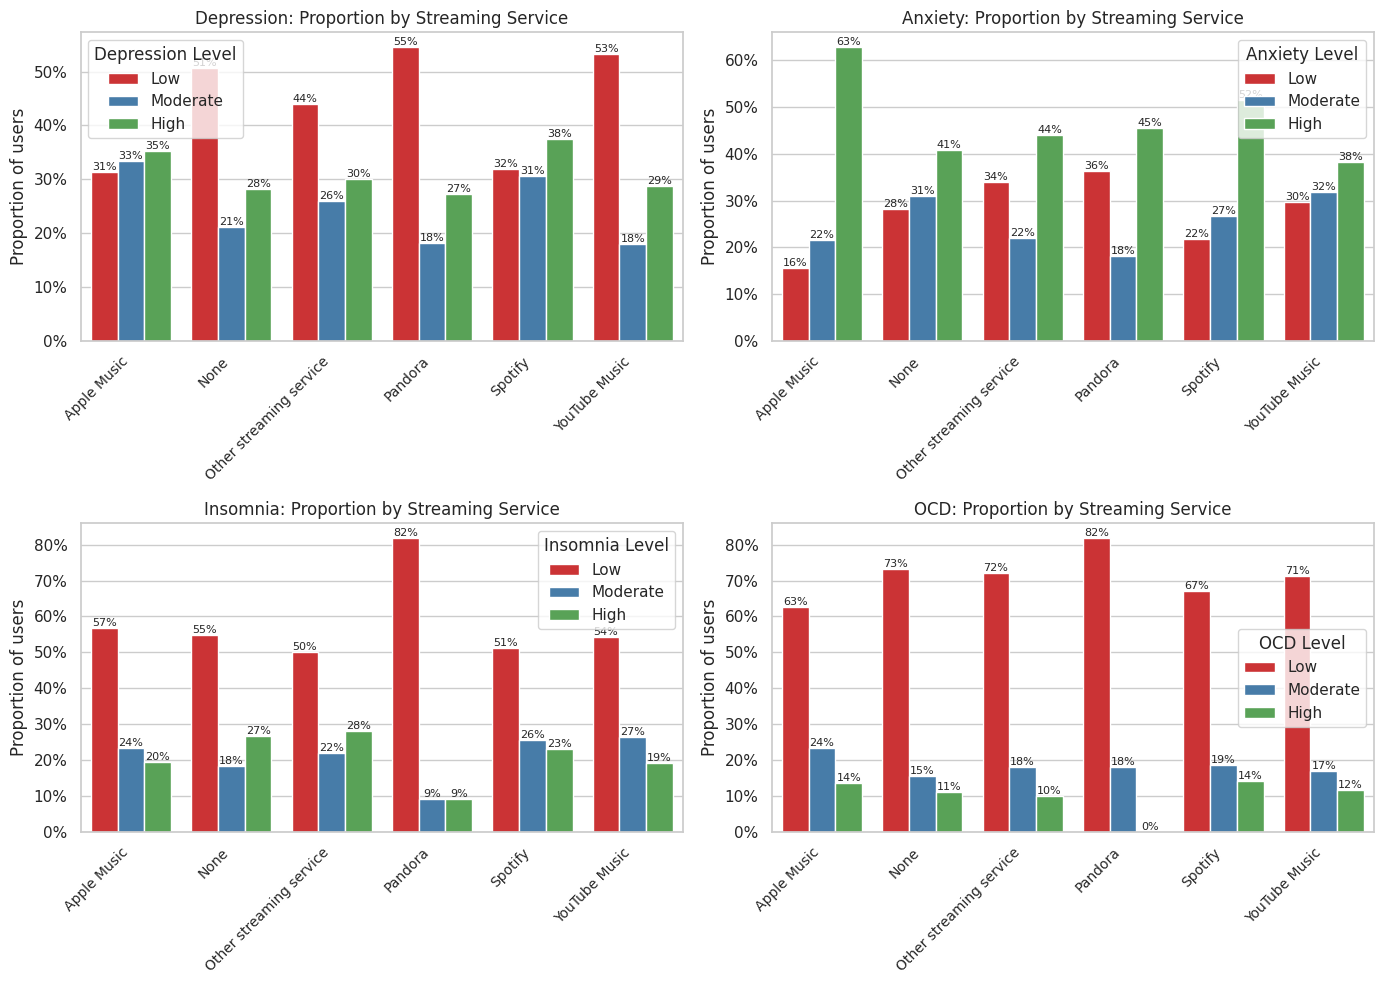

In [57]:
#The above plot is interesting, but I thought it may be better to also view it in terms of proportions of users
#I'll repeat some of the similar setup functions as above
df['Streaming_Short'] = (
    df['Primary streaming service']
      .replace({
          'I do not use a streaming service.': 'None',
          'Other streaming service.': 'Other'
      })
)

#I'll filter out any missing responses entirely as I did above
plot_df = df[df['Streaming_Short'].notna()]

#I'll build out the ordered list of services
services = sorted(plot_df['Streaming_Short'].unique())

#This sets up the plot as we've been doing with the different levels, etc.
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (14, 10)

levels    = ['Low', 'Moderate', 'High']
plot_args = [
    ('Depression_Level', 'Depression'),
    ('Anxiety_Level',    'Anxiety'),
    ('Insomnia_Level',   'Insomnia'),
    ('OCD_Level',        'OCD')
]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for ax, (lvl_col, title) in zip(axes.flatten(), plot_args):
    #First I'll build a per‐service × level crosstab of proportions
    ct = pd.crosstab(
        plot_df['Streaming_Short'],
        plot_df[lvl_col],
        normalize='index'      #Each row (service) should sum to 1
    )
    #I'll turn this back into a long DataFrame so we can visualize
    prop_df = (
        ct
        .reset_index()         #This brings 'Streaming_Short' back as a column
        .melt(
            id_vars='Streaming_Short',
            value_vars=levels,      #references the levels that we made earlier
            var_name=lvl_col,
            value_name='Proportion'
        )
    )

    #Of course, this plots
    sns.barplot(
        data=prop_df,
        x='Streaming_Short',
        y='Proportion',
        hue=lvl_col,
        hue_order=levels,
        order=services,
        palette='Set1',
        ax=ax
    )

    #This is some additional formatting that matches the format of the previous visual (absolute values rather than proportion)
    ax.set_title(f"{title}: Proportion by Streaming Service")
    ax.set_xlabel('')
    ax.set_ylabel('Proportion of users')
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)
    ax.legend(title=f"{title} Level")

    #Here I annotate each bar with its percentage
    for container in ax.containers:
        ax.bar_label(container, fmt='%.0f%%', label_type='edge', fontsize=8)

plt.tight_layout()
plt.show()

In [58]:
#Clearly, this visual is quite different from the previous one that counted the absolute number of users on each streaming platform

#Depression:
  #Takeaway: While Spotify and Apple Music both have big absolute user bases, Spotify has the highest share of "High" depression users, whereas Pandora is much more conentrated among "Low" users

#Anxiety:
  #Spotify users are disproportionately in the High-Anxiety group, even more so than for depression. Other platforms are more Low or Moderate skewed.

#Insomnia:
  #Pandora users overwhelmingly report Low insomnia, whereas Spotify and YouTube Music have a harger High-insomnia tail.

#OCD:
  #Across all services, OCD High-cases are rare. Pandora and Others are nearly 100% Low-OCD, while Spotify has the relatively largest share of High-OCD users.

Healtmap showcasing Pearson Correlations between Genre Frequency and Mental Health Symptom

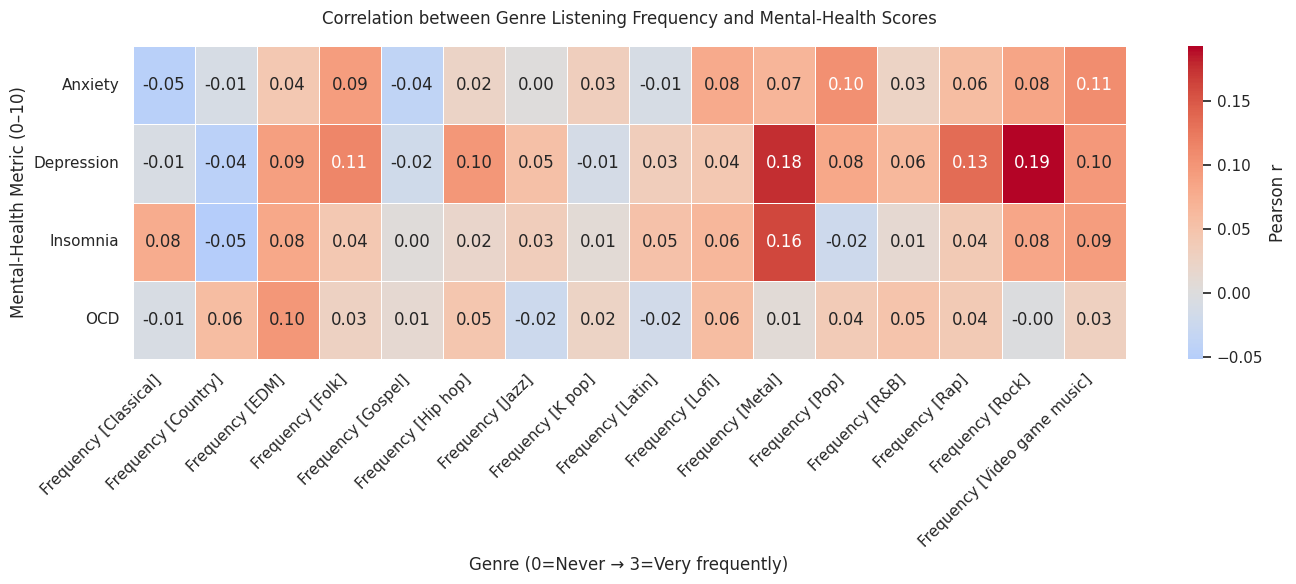

In [59]:
#First I'll define the mental‐health columns
health_cols = ['Anxiety', 'Depression', 'Insomnia', 'OCD']

#Then I'll compute the correlation matrix between each health metric and each genre frequency
corr = df[genre_cols + health_cols].corr().loc[health_cols, genre_cols]

#Finally I'll plot it as a heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    linewidths=0.5,
    cbar_kws={'label': 'Pearson r'}
)
plt.title("Correlation between Genre Listening Frequency and Mental-Health Scores", pad=16)
plt.xlabel("Genre (0=Never → 3=Very frequently)")
plt.ylabel("Mental-Health Metric (0–10)")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


#Mini Key:
  #Positive values (red) indicate that higher frequency of that genre tends to go hand-in-hand with higher self-reported symptoms
  #Negative values (blue) shows genres taht correlate with lower symptoms
  #The annotated numbers are Pearson r coefficients (-1 to +1)#

In [67]:
#Depression has the strongest positive links with Rock (r = 0.19) and Metal (r = 0.18), then moderate associations with Rap and EDM(around 0.11)
#Anxiety has the biggest upticks in Rock, Pop, and EDM. This suggests a mild lean toward energetic genres as anxiety increases
#Insomnia correlates mostly with Metal (r = 0.16) and to a lesser extent Rock and Lofi (r = 0.8), hinting that those struggling to sleep may turn to music-heavy or chill-out styles.
#OCD correlations are nearly zero across the board. The largest is EDM at r = 0.10. This indicates no strong genre-level signal for obsessive-complusive symptoms.

KDE Plot Showcasing Age Distribution

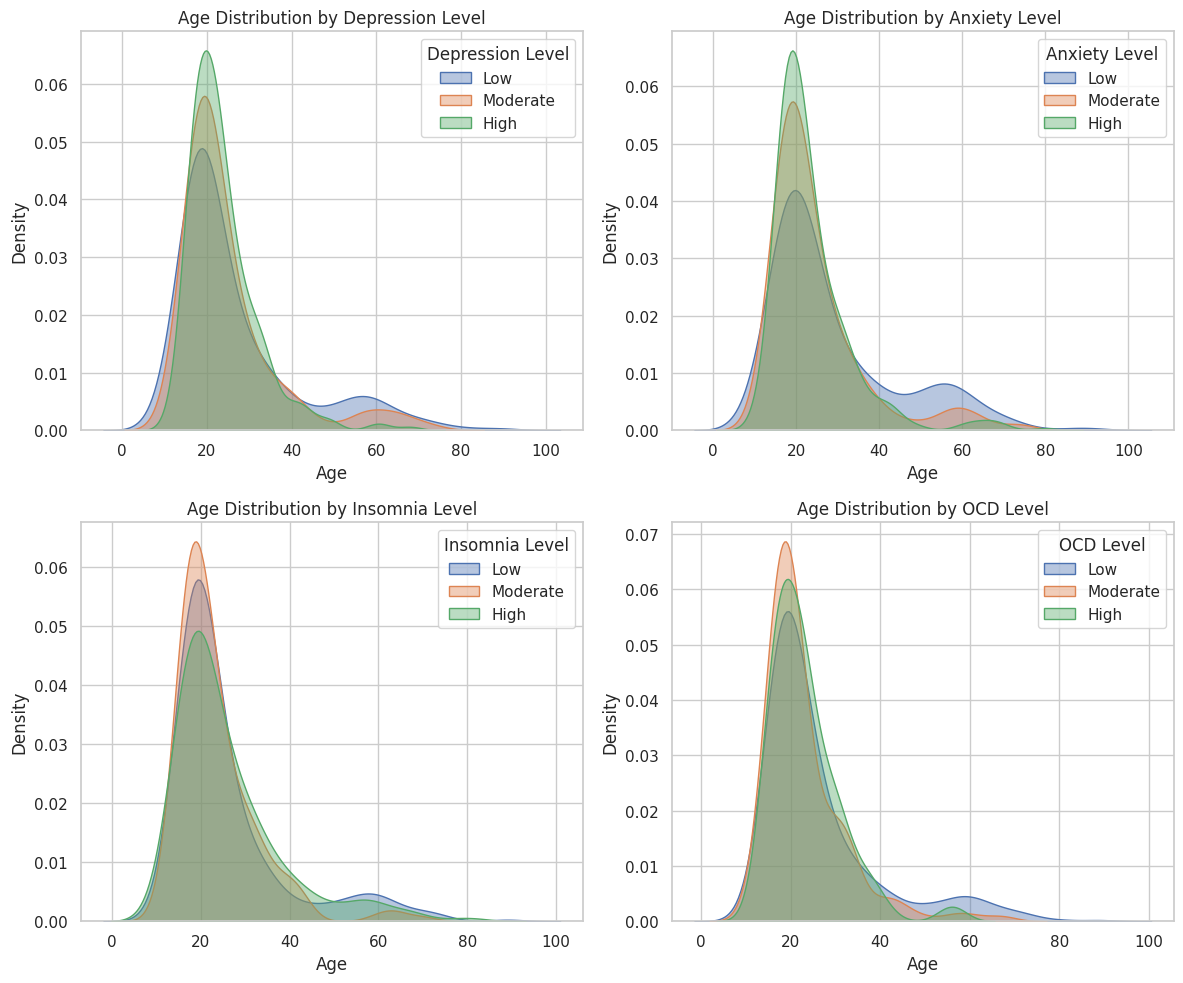

In [68]:
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 10)

levels    = ['Low', 'Moderate', 'High']
plot_args = [
    ('Depression_Level', 'Depression'),
    ('Anxiety_Level',    'Anxiety'),
    ('Insomnia_Level',   'Insomnia'),
    ('OCD_Level',        'OCD')
]

fig, axes = plt.subplots(2, 2)

for ax, (lvl_col, title) in zip(axes.flatten(), plot_args):
    for lvl in levels:
        subset = df.loc[df[lvl_col] == lvl, 'Age'].dropna()
        sns.kdeplot(
            data=subset,
            label=lvl,
            fill=True,
            alpha=0.4,
            ax=ax
        )
    ax.set_title(f'Age Distribution by {title} Level')
    ax.set_xlabel('Age')
    ax.set_ylabel('Density')
    ax.legend(title=f'{title} Level')

plt.tight_layout()
plt.show()

In [69]:
#Depression: All three curves peak in the early 20s, but the Low-depression group shows a longer tail into later adulthood (people in their 40s–60s). High-depression is more tightly clustered among younger listeners.
#Anxiety: Very similar story to Depression. High-anxiety respondents are almost entirely under 30, while the Low-anxiety curve spreads further into older ages, suggesting fewer older people report low anxiety.
#Insomnia: The three curves almost overlay, but there’s a slight bulge in the 30–60 range for Low insomnia and an extra bump around age 20 for Moderate. This indicates sleep issues don’t vary strongly by age in this sample.
#OCD: Again, very similar shapes, with Low-OCD showing a bit more representation past age 40. High-OCD is tightly focused on the 18–30 range.